## **EDA Spatial indicators notebook**

## Preparación y Análisis de Datos

Esta sección del notebook cubre la configuración y los pasos preliminares para la preparación y análisis de datos. Las siguientes bibliotecas y módulos se importan para apoyar diversas tareas:

- **json**: Para manejar archivos y datos JSON.
- **pandas**: Para la manipulación y análisis de datos.
- **os**: Para interactuar con el sistema operativo, específicamente para la gestión de archivos y directorios.
- **numpy**: Para operaciones numéricas y manipulaciones de arrays.
- **datetime**: Para trabajar con datos de fecha y hora.
- **sys**: Para manipular el entorno de ejecución de Python.
- **chardet**: Para la detección de codificación de caracteres.
- **sweetviz**: Para generar visualizaciones e informes de análisis exploratorio de datos.
- **utilities_meli**: Funciones utilitarias personalizadas específicas para el proyecto.

La variable `module_path` establece la ruta a los scripts de Python del proyecto, asegurando que los módulos personalizados puedan ser importados y utilizados.


In [1]:
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#
# os.getcwd()
os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/BairesDev/geophysical_nn_data")


 Carga y Visualización Inicial de Datos

En esta sección, se realiza la carga de los datos desde un archivo JSONL y se visualizan las primeras filas del DataFrame resultante para verificar su contenido. Los pasos son los siguientes:

1. **Leer el archivo JSONL**: Se utiliza la función `pd.read_json` de la biblioteca `pandas` para leer el archivo JSONL (`MLA_100k_checked_v3.jsonlines`) y cargar los datos en un DataFrame de `pandas`.
2. **Mostrar las primeras filas**: Se llama al método `head()` del DataFrame para mostrar las primeras filas, lo que permite una inspección rápida de la estructura y el contenido de los datos cargados.

In [3]:
# Leer el archivo csv como un DataFrame
df_puntos = pd.read_csv("Data/Inputs/EMAG2_V3_20170530.csv", sep = ",", header = None)
df_puntos.head()

,0,1,2,3,4,5,6,7
0,1,5400,0.016667,-89.983333,99999.0,-101.303841,2,58
1,2,5400,0.050000,-89.983333,99999.0,-101.443093,2,58
2,3,5400,0.083333,-89.983333,99999.0,-101.688686,2,58
3,4,5400,0.116667,-89.983333,99999.0,-101.978599,2,58
4,5,5400,0.150000,-89.983333,99999.0,-102.401046,2,58


In [4]:
# Define column names based on EMAG2_V3 format
column_names = [
    'i',                                    # grid column/longitude index
    'j',                                    # grid row/latitude index
    'LON',                                  # Geographic Longitude WGS84 (decimal degrees)
    'LAT',                                  # Geographic Latitude WGS84 (decimal degrees)
    'Magnetic_Anomaly_at_Sea_Level',        # Magnetic Anomaly Value at Sea Level(nT)
    'Magnetic_Anomaly_at_4km_Altitude',     # Magnetic Anomaly Value at continuous 4km altitude (nT)
    'Source_Code',                          # Data Source Code (see table below)
    'Error'                                 # Error estimate (nT)
]

# Assign column names to the dataframe
df_puntos.columns = column_names

In [5]:
df_puntos.head()

,i,j,LON,LAT,Magnetic_Anomaly_at_Sea_Level,Magnetic_Anomaly_at_4km_Altitude,Source_Code,Error
0,1,5400,0.016667,-89.983333,99999.0,-101.303841,2,58
1,2,5400,0.050000,-89.983333,99999.0,-101.443093,2,58
2,3,5400,0.083333,-89.983333,99999.0,-101.688686,2,58
3,4,5400,0.116667,-89.983333,99999.0,-101.978599,2,58
4,5,5400,0.150000,-89.983333,99999.0,-102.401046,2,58


## Control de Registros y EDA base de datos

En esta sección, se realiza una verificación de los tipos de datos de las columnas y se imprime el número de columnas y filas del DataFrame consolidado. Esto ayuda a asegurarse de que los datos se han cargado y transformado correctamente.

1. **Verificación de Tipos de Datos**:
   - Se utiliza `print(df_productos_00.dtypes)` para mostrar los tipos de datos de cada columna en el DataFrame. Esto es útil para identificar cualquier inconsistencia en los tipos de datos después de la transformación.

2. **Número de Columnas y Filas**:
   - Se obtienen y se imprimen el número de columnas y filas del DataFrame utilizando `df_productos_00.shape`. Esto proporciona una visión general del tamaño del DataFrame después de todas las operaciones de limpieza y normalización.

de igual manera, En esta sección, se eliminan algunas columnas innecesarias del DataFrame y se realiza un análisis exploratorio de datos (EDA) utilizando la biblioteca `sweetviz`.

4. **Eliminación de Columnas Innecesarias**:
   - Se eliminan columnas que contienen listas y que en su mayoría están vacías (`sub_status`, `deal_ids`, `variations`, `tags`, `listing_source`, `coverage_areas`, `descriptions`, `thumbnail`, `secure_thumbnail`, `methods`, `free_methods`). Esto se hace para simplificar el DataFrame y centrarse en las columnas más relevantes.
   - El parámetro `errors='ignore'` se utiliza para evitar errores si alguna de las columnas especificadas no está presente en el DataFrame.

3. **Análisis Exploratorio de Datos (EDA)**:
   - Se utiliza `sweetviz` para generar un informe de análisis exploratorio de datos. `sweetviz` proporciona visualizaciones detalladas y estadísticas descriptivas que ayudan a comprender mejor los datos.
   - El informe se guarda como un archivo HTML (`EDA_BD_inicial_ML.html`) en el directorio de salida.

In [6]:
# Convert Source_Code to string and pad with zeros
df_puntos['Source_Code_str'] = df_puntos['Source_Code'].astype(str).str.zfill(3)

In [7]:
# Define the mapping dictionary for Source_Code
source_code_mapping = {
    '001': 'West Asia',
    '002': 'Antarctica',
    '003': 'Afghanistan',
    '004': 'Alaska',
    '005': 'Algeria',
    '006': 'Arctic',
    '007': 'Argentina onshore',
    '008': 'Argentina offshore',
    '009': 'Australia',
    '010': 'Austria',
    '011': 'Bolivia',
    '013': 'East Asia',
    '014': 'Europe',
    '015': 'Eurasia',
    '016': 'Fennoscandia',
    '017': 'France',
    '018': 'Western Europe',
    '019': 'Getech',
    '020': 'India',
    '021': 'East India',
    '022': 'Iraq',
    '023': 'Italy',
    '024': 'Ivory Coast',
    '025': 'Japan',
    '026': 'Hawaii',
    '027': 'Middle East',
    '029': 'New Zealand',
    '030': 'Pakistan',
    '031': 'Papua',
    '032': 'Russia',
    '033': 'Saudi Arabia',
    '034': 'South Africa',
    '035': 'Spain',
    '036': 'Tanzania',
    '037': 'NAMAG',
    '038': 'Former Soviet Union',
    '101': 'Arabian',
    '102': 'Arabian aeromag',
    '103': 'Baja',
    '104': 'Central Atlantic',
    '105': 'Caribbean',
    '106': 'Fuego',
    '107': 'Hope',
    '108': 'Indian',
    '109': 'Mediterranean',
    '110': 'North Atlantic 1',
    '111': 'North Atlantic 2',
    '112': 'North Atlantic 3',
    '113': 'North Atlantic 4',
    '114': 'North Atlantic 5',
    '115': 'North Pacific',
    '116': 'Northwest Pacific',
    '117': 'South Ocean',
    '118': 'South Pacific',
    '119': 'Southeast Pacific',
    '120': 'Southwest Atlantic',
    '121': 'Tasman',
    '888': 'Ambiguous',
    '999': 'No data'
}


# Map Source_Code values
df_puntos['Source_Code_str'] = df_puntos['Source_Code_str'].map(source_code_mapping)

In [8]:
#####################
# Control Registros
#####################
print(df_puntos.dtypes)
# Número de columnas y filas
num_columnas = df_puntos.shape[1]
num_filas = df_puntos.shape[0]
print(f"\nNúmero de columnas: {num_columnas}")
print(f"Número de filas: {num_filas}")

i                                     int64
j                                     int64
LON                                 float64
LAT                                 float64
Magnetic_Anomaly_at_Sea_Level       float64
Magnetic_Anomaly_at_4km_Altitude    float64
Source_Code                           int64
Error                                 int64
Source_Code_str                      object
dtype: object

Número de columnas: 9
Número de filas: 58320000


In [9]:
# Analisis EDA
# Analyzing the dataset
#advert_report = sv.analyze(df_puntos)
#advert_report.show_html('EDA_BD_inicial_ML.html')

In [10]:
df_puntos[(df_puntos.Magnetic_Anomaly_at_Sea_Level < 999)].Source_Code_str.value_counts().sort_index()

Alaska                  428270
Algeria                  12970
Ambiguous               428787
Arabian                1811738
Arabian aeromag         547735
Arctic                 1130459
Argentina offshore       89992
Argentina onshore        16333
Australia               198535
Baja                    272718
Caribbean               134103
Central Atlantic       1537584
East Asia               874874
East India                8963
Eurasia                  15910
Fennoscandia              6013
Former Soviet Union     405431
France                   96884
Fuego                   458998
Getech                  872892
Hawaii                    1076
Hope                   1188437
India                    22440
Indian                  968174
Italy                    59998
Ivory Coast                 76
Japan                    80521
Mediterranean            26390
Middle East               3627
NAMAG                   555707
New Zealand               3152
No data                 164455
North At

In [11]:
df_puntos_magnetic = df_puntos


#df_puntos_magnetic = df_puntos[(df_puntos.Source_Code_str == 'Getech')&(df_puntos.Magnetic_Anomaly_at_Sea_Level < 999)]

In [12]:
# Assuming df_puntos_magnetic is your dataframe
df_puntos_magnetic['Magnetic_Anomaly_mGal'] = np.where(df_puntos_magnetic['Magnetic_Anomaly_at_Sea_Level'] != 99999.0,
                                                       df_puntos_magnetic['Magnetic_Anomaly_at_Sea_Level'] * 0.01,
                                                       df_puntos_magnetic['Magnetic_Anomaly_at_4km_Altitude'] * 0.01)
df_puntos_magnetic = df_puntos_magnetic[(df_puntos_magnetic.Magnetic_Anomaly_mGal < 999)]

In [13]:
# Print results
print(f"Mean gravity anomaly at sea level (mGal): {df_puntos_magnetic['Magnetic_Anomaly_mGal'].mean()}")
print(f"Standard deviation of gravity anomaly at sea level (mGal): {df_puntos_magnetic['Magnetic_Anomaly_mGal'].std()}")

Mean gravity anomaly at sea level (mGal): -0.006610985764707902
Standard deviation of gravity anomaly at sea level (mGal): 1.0017047338131546


In [14]:
print(df_puntos_magnetic.shape)
df_puntos_magnetic.tail(5)

(56506754, 10)


,i,j,LON,LAT,Magnetic_Anomaly_at_Sea_Level,Magnetic_Anomaly_at_4km_Altitude,Source_Code,Error,Source_Code_str,Magnetic_Anomaly_mGal
58319995,10796,1,359.850000,89.983333,99999.0,-99.207595,6,167,Arctic,-0.992076
58319996,10797,1,359.883333,89.983333,99999.0,-99.201699,6,167,Arctic,-0.992017
58319997,10798,1,359.916667,89.983333,99999.0,-99.195807,6,167,Arctic,-0.991958
58319998,10799,1,359.950000,89.983333,99999.0,-99.189905,6,167,Arctic,-0.991899
58319999,10800,1,359.983333,89.983333,99999.0,-99.184003,6,167,Arctic,-0.991840


In [15]:
df_puntos_magnetic.LON.describe()

count    5.650675e+07
mean     1.815501e+02
std      1.032362e+02
min      1.666667e-02
25%      9.335000e+01
50%      1.820167e+02
75%      2.704500e+02
max      3.599833e+02
Name: LON, dtype: float64

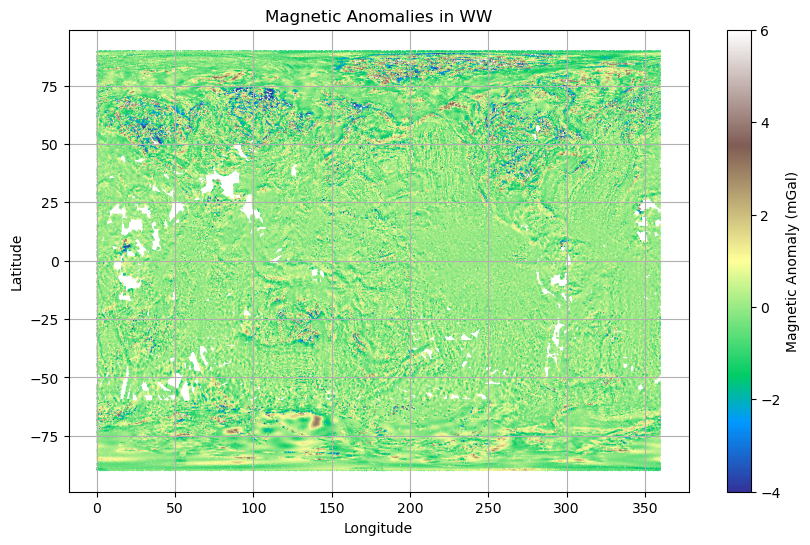

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 6))

# Sample 1 million rows from df_puntos_SA
df_sampled = df_puntos_magnetic.sample(n=1000000, random_state=42)

# Ensure the data is correctly referenced
lon_values = df_sampled['LON']
lat_values = df_sampled['LAT']
magnetic_anomaly_mGal = df_sampled['Magnetic_Anomaly_mGal']

# Define the normalization for the color scale
norm = Normalize(vmin=-4, vmax=6)  # Adjust vmin and vmax as per your preference
# Scatter plot with color mapped to Magnetic Anomaly values
sc = ax.scatter(lon_values, lat_values, s=0.15, c=magnetic_anomaly_mGal, cmap='terrain',  linewidth=-0.3, norm = norm)

# Add colorbar
plt.colorbar(sc, label='Magnetic Anomaly (mGal)')

# Customize plot (add title, labels, grid, etc.)
ax.set_title('Magnetic Anomalies in WW')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Show the plot
plt.show()

![NOAA Gravity Map of World Wide Anomaly](https://www.ngdc.noaa.gov/mgg/gravity/1999/data/global/sandwell/ww_grav.gif)

In [17]:
import numpy as np
import pandas as pd

# File path
file_path = 'Data/Inputs/ww_grav.xyz'

In [19]:
# Read the .xyz file into a pandas dataframe
df = pd.read_csv(file_path, sep = ",")
# Rename columns 'latitude' to 'longitude' and 'longitude' to 'latitude'
df = df.rename(columns={'latitude': 'longitude', 'longitude': 'latitude'})

In [20]:
df.head()

,longitude,latitude,grav_anom
0,1,1,30.2
1,2,1,31.1
2,3,1,31.9
3,4,1,32.7
4,5,1,33.3


In [21]:
max(df.latitude)

4224

In [22]:
# Create longitude and latitude arrays
lon_start, lon_end = 0.025, 389.975
lat_start, lat_end = 71.998, -71.997

lon_values = np.linspace(lon_start, lon_end, 7800)
lat_values = np.linspace(lat_start, lat_end, 4224)

In [23]:
# Create a mapping dictionary
mapping = {idx + 1: lat_values[idx] for idx in range(len(df['latitude'].unique()))}
mapping_lon = {idx + 1: lon_values[idx] for idx in range(len(df['longitude'].unique()))}

# Replace the 'latitude' values in the dataframe using the mapping
df['latitude'] = df['latitude'].map(mapping)
df['longitude'] = df['longitude'].map(mapping_lon)

In [24]:
df.tail()

,longitude,latitude,grav_anom
32947195,389.775,-71.997,23.6
32947196,389.825,-71.997,23.6
32947197,389.875,-71.997,23.5
32947198,389.925,-71.997,23.6
32947199,389.975,-71.997,23.6


In [25]:
df.head()

,longitude,latitude,grav_anom
0,0.025,71.998,30.2
1,0.075,71.998,31.1
2,0.125,71.998,31.9
3,0.175,71.998,32.7
4,0.225,71.998,33.3


In [26]:
#!pip install cartopy

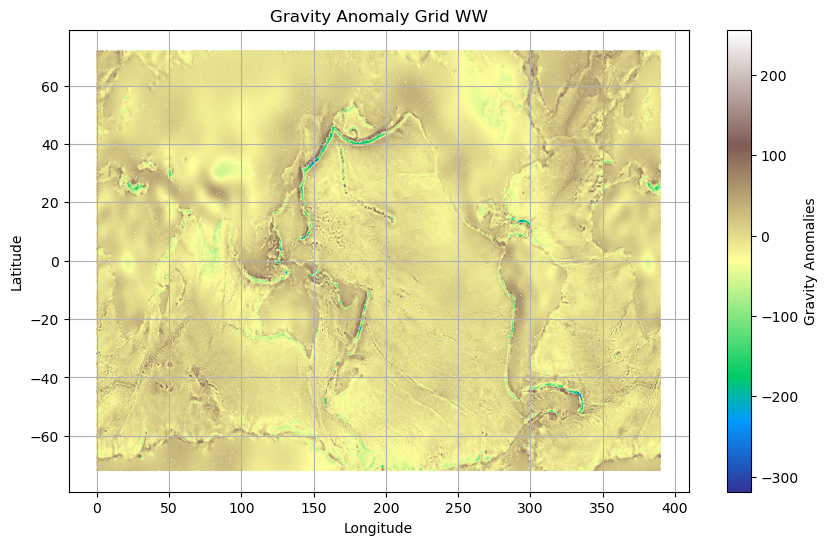

In [27]:
# Plotting setup
fig, ax = plt.subplots(figsize=(10, 6))

# Sample 1 million rows from df_puntos_SA
df_sampled = df.sample(n=1000000, random_state=42)

# Ensure the data is correctly referenced
lon_values = df_sampled['longitude']
lat_values = df_sampled['latitude']
gravity_anomaly = df_sampled['grav_anom']

# Define the normalization for the color scale
#norm = Normalize(vmin=-4, vmax=6)  # Adjust vmin and vmax as per your preference
# Scatter plot with color mapped to Magnetic Anomaly values
sc = ax.scatter(lon_values, lat_values, s=0.15, c=gravity_anomaly, cmap='terrain',  linewidth=-0.3)

# Add colorbar
plt.colorbar(sc, label='Gravity Anomalies')

# Customize plot (add title, labels, grid, etc.)
ax.set_title('Gravity Anomaly Grid WW')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Show the plot
plt.show()

In [28]:
# Round latitude and longitude columns to 3 decimals in both dataframes
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)
df_puntos_magnetic['LAT'] = df_puntos_magnetic['LAT'].round(2)
df_puntos_magnetic['LON'] = df_puntos_magnetic['LON'].round(2)

# Perform spatial join based on latitude and longitude
merged_df = pd.merge(df, df_puntos_magnetic, right_on=['LAT', 'LON'], left_on=['latitude', 'longitude'], how='inner')

/var/folders/5y/btn5zvyd1dvbpbhrdn18qgkw0000gn/T/ipykernel_5741/2800851167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puntos_magnetic['LAT'] = df_puntos_magnetic['LAT'].round(2)
/var/folders/5y/btn5zvyd1dvbpbhrdn18qgkw0000gn/T/ipykernel_5741/2800851167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puntos_magnetic['LON'] = df_puntos_magnetic['LON'].round(2)


In [29]:
merged_df.shape

(7007195, 13)

In [30]:
merged_df.head()

,longitude,latitude,grav_anom,i,j,LON,LAT,Magnetic_Anomaly_at_Sea_Level,Magnetic_Anomaly_at_4km_Altitude,Source_Code,Error,Source_Code_str,Magnetic_Anomaly_mGal
0,0.02,71.62,49.8,1,552,0.02,71.62,-107.507591,-106.714709,6,167,Arctic,-1.075076
1,0.08,71.62,50.6,3,552,0.08,71.62,-121.005862,-120.308584,6,167,Arctic,-1.210059
2,0.12,71.62,50.4,4,552,0.12,71.62,-126.232840,-125.518499,6,167,Arctic,-1.262328
3,0.18,71.62,49.4,6,552,0.18,71.62,-133.129936,-132.226507,6,167,Arctic,-1.331299
4,0.22,71.62,48.3,7,552,0.22,71.62,-134.466847,-133.647395,6,167,Arctic,-1.344668


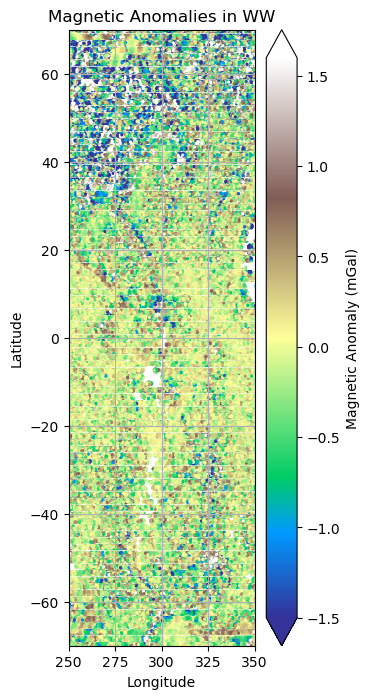

In [31]:
# Plotting setup
fig, ax = plt.subplots(figsize=(3, 8))  # Adjust figsize as needed

# Sample 1 million rows from df_puntos_SA
df_sampled = merged_df.sample(n=1500000, random_state=42)


# Ensure the data is correctly referenced
lon_values = df_sampled['LON']
lat_values = df_sampled['LAT']
magnetic_anomaly_mGal = df_sampled['Magnetic_Anomaly_mGal']

# Define the normalization for the color scale
norm = Normalize(vmin=-1.5, vmax=1.6)  # Adjust vmin and vmax as per your preference

# Scatter plot with color mapped to Magnetic Anomaly values
sc = ax.scatter(lon_values, lat_values, s=1.5, c=magnetic_anomaly_mGal, cmap='terrain', norm = norm)

# Add colorbar
cb = plt.colorbar(sc, label='Magnetic Anomaly (mGal)', extend='both')  # Extend colorbar to include arrows

# Customize plot (add title, labels, grid, etc.)
ax.set_title('Magnetic Anomalies in WW')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Show the plot
plt.xlim(250, 350)
plt.ylim(-70,70)
plt.show()

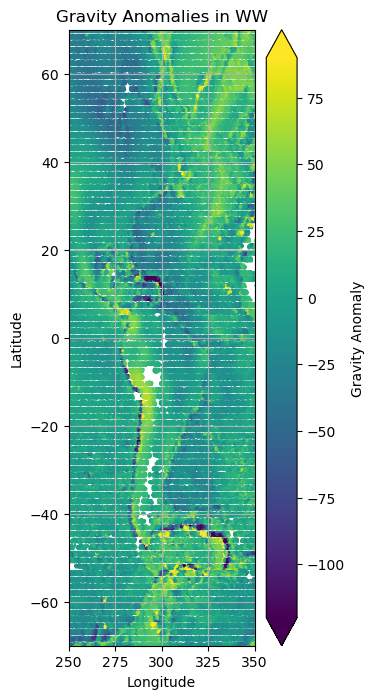

In [32]:
# Plotting setup
fig, ax = plt.subplots(figsize=(3, 8))  # Adjust figsize as needed

# Sample 1 million rows from df_puntos_SA
df_sampled = merged_df.sample(n=1000000, random_state=42)

# Ensure the data is correctly referenced
lon_values = df_sampled['LON']
lat_values = df_sampled['LAT']
grav_anom = df_sampled['grav_anom']

# Define the normalization for the color scale
norm = Normalize(vmin=-120, vmax=90)  # Adjust vmin and vmax as per your preference

# Scatter plot with color mapped to Magnetic Anomaly values
sc = ax.scatter(lon_values, lat_values, s= 1.5, c=grav_anom, cmap='viridis', norm = norm)

# Add colorbar
cb = plt.colorbar(sc, label='Gravity Anomaly', extend='both')  # Extend colorbar to include arrows

# Customize plot (add title, labels, grid, etc.)
ax.set_title('Gravity Anomalies in WW')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Show the plot
plt.xlim(250, 350)
plt.ylim(-70,70)
plt.show()

In [33]:
merged_df.head()

,longitude,latitude,grav_anom,i,j,LON,LAT,Magnetic_Anomaly_at_Sea_Level,Magnetic_Anomaly_at_4km_Altitude,Source_Code,Error,Source_Code_str,Magnetic_Anomaly_mGal
0,0.02,71.62,49.8,1,552,0.02,71.62,-107.507591,-106.714709,6,167,Arctic,-1.075076
1,0.08,71.62,50.6,3,552,0.08,71.62,-121.005862,-120.308584,6,167,Arctic,-1.210059
2,0.12,71.62,50.4,4,552,0.12,71.62,-126.232840,-125.518499,6,167,Arctic,-1.262328
3,0.18,71.62,49.4,6,552,0.18,71.62,-133.129936,-132.226507,6,167,Arctic,-1.331299
4,0.22,71.62,48.3,7,552,0.22,71.62,-134.466847,-133.647395,6,167,Arctic,-1.344668


In [34]:
df_final = merged_df[['latitude','longitude','grav_anom','Magnetic_Anomaly_mGal']].drop_duplicates()

In [35]:
# Create a smaller sample
sample_size = 2000000  # Adjust this number as needed
df_final_sample = df_final.sample(n=sample_size, random_state=42)

In [38]:
df_final_sample.to_parquet('Data/Outputs/nn_data.gzip.parquet')

In [ ]:
struct VirtualAccessPoint: MapItem, Identifiable {
    let id: UUID
    let coordinate: CLLocationCoordinate2D
    let altitude: Double
    let magneticAnomaly: Double
    let gravityAnomaly: Double
    let pressureOffset: Double
    let timestamp: Date
}

In [ ]:
struct GridCell {
    let id: UUID
    let coordinate: CLLocationCoordinate2D
    let size: Double // in meters
    var shift: CGVector // to simulate "ocean current" movement
}

In [ ]:
protocol MapItem {
    var coordinate: CLLocationCoordinate2D { get }
}

struct IdentifiableMapItem: Identifiable {
    let id = UUID()
    let item: any MapItem
    
    var coordinate: CLLocationCoordinate2D {
        item.coordinate
    }
}

In [ ]:
KP index DST INdexes

In [ ]:
geology observatories

In [ ]:
magnetic filed 